<a href="https://colab.research.google.com/github/ChowMeinFan/Classifying-Cells-Using-Machine-Learning/blob/main/ClassifyingCells(Pretrained).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount our Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import necessary packages
import numpy as np
from tensorflow import keras
from keras import layers
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Nadam, Adamax, Lion, Adafactor
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from mlxtend.evaluate import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf

image_size = (224, 224)
class_names = ['COS7', 'HEK293T', 'L', 'NC']


train_path = '/content/drive/MyDrive/CSC308CellImagesV2/TrainingData'
test_path = '/content/drive/MyDrive/CSC308CellImagesV2/TestingData'
valid_path = '/content/drive/MyDrive/CSC308CellImagesV2/ValidationData'

In [ ]:
#Assign variables to our preseparated datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=image_size, batch_size=14, label_mode='categorical')
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(valid_path, image_size=image_size, batch_size=3, label_mode='categorical')
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=image_size, batch_size=3, label_mode='categorical')

Found 84 files belonging to 4 classes.
Found 12 files belonging to 4 classes.
Found 24 files belonging to 4 classes.


In [ ]:
#Import a pretrained model (VGG16)
vgg16_model = tf.keras.applications.VGG16()

In [ ]:
#Function to track time, Initialize a callback object
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
#Pull layers from pretrained model
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False

model.add(Dense(len(class_names), activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(Adam(learning_rate=.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(
     train_dataset,
     #steps_per_epoch = 6, #train_batches.samples // 12
     validation_data = valid_dataset,
     #validation_steps = 3, #valid_dataset.samples // 8,
     epochs=8,
     callbacks=[cb],
     verbose=1)

Epoch 1/8
6/6 [==============================] - 3s 215ms/step - loss: 1.4877 - accuracy: 0.4643 - val_loss: 0.5415 - val_accuracy: 0.6667
Epoch 2/8
6/6 [==============================] - 1s 109ms/step - loss: 0.4233 - accuracy: 0.8333 - val_loss: 0.5970 - val_accuracy: 0.6667
Epoch 3/8
6/6 [==============================] - 1s 101ms/step - loss: 0.2140 - accuracy: 0.9167 - val_loss: 0.1146 - val_accuracy: 1.0000
Epoch 4/8
6/6 [==============================] - 1s 99ms/step - loss: 0.1029 - accuracy: 0.9643 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 5/8
6/6 [==============================] - 1s 101ms/step - loss: 0.0679 - accuracy: 0.9762 - val_loss: 0.1062 - val_accuracy: 0.9167
Epoch 6/8
6/6 [==============================] - 1s 101ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 1.0000
Epoch 7/8
6/6 [==============================] - 1s 101ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 1.0000
Epoch 8/8
6/6 [=============

In [ ]:
#Output our callback object
print(cb.logs)
print("Total Model Training Time:", sum(cb.logs))

[3.25933397, 1.4111163690000126, 1.1294825690000039, 0.9960438869999848, 1.0036247019999678, 1.0012039359999676, 1.0005265439999675, 0.9847180689999959]
Total Model Training Time: 10.7860500459999


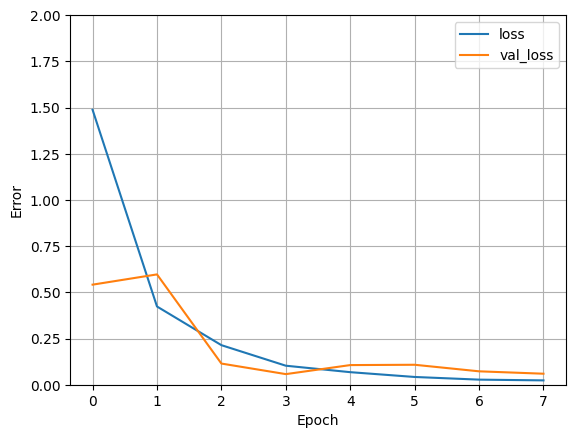

In [ ]:
#Learning Curve
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
#Evaluate our model
score = model.evaluate(test_dataset, steps = 1, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.5711383819580078
Test accuracy: 0.3333333432674408


Found 24 images belonging to 5 classes.
Confusion matrix, without normalization
[[0 0 0 0 0]
 [1 1 0 4 0]
 [0 4 2 0 0]
 [1 1 4 0 0]
 [0 0 0 6 0]]


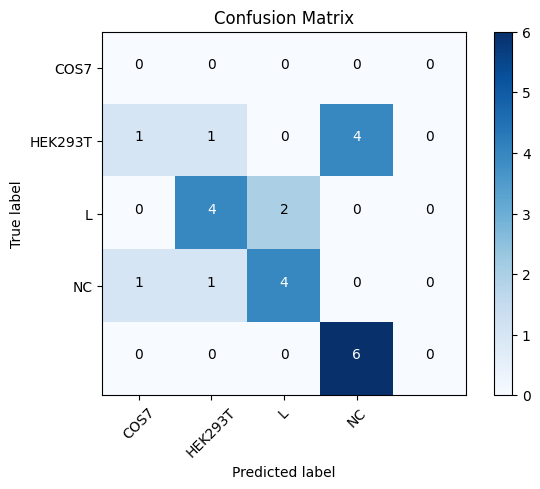

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

test_batches = ImageDataGenerator() \
                .flow_from_directory(test_path,
                                     target_size=(224,224),
                                     shuffle=False,
                                     batch_size=133)
test_imgs, test_labels = next(test_batches)
predictions = model.predict(test_batches, steps=1, verbose=0)
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1), binary=False)
cm_plot_labels = class_names
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')